# Proyecto final Karina Cardozo 
# p1__Correlación

# AED 1 🤓

# 1) Cargamos los datos 📕

In [2]:
import pandas as pd
from funpymodeling.exploratory import status, freq_tbl, profiling_num
import seaborn as sns 

In [3]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [4]:
data=pd.read_csv("data/customer_dataset.csv", sep = ",")

In [5]:
data.head(5)

orderAmount orderState paymentMethodRegistrationFailure paymentMethodType  \
0         18.0    pending                             True              card   
1         26.0  fulfilled                             True           bitcoin   
2         45.0  fulfilled                            False              card   
3         23.0  fulfilled                            False              card   
4         43.0  fulfilled                            False              card   

         paymentMethodProvider     paymentMethodIssuer  transactionAmount  \
0                 JCB 16 digit    Citizens First Banks                 18   
1                VISA 16 digit            Solace Banks                 26   
2                VISA 16 digit          Vertex Bancorp                 45   
3  Diners Club / Carte Blanche  His Majesty Bank Corp.                 23   
4                   Mastercard          Vertex Bancorp                 43   

   transactionFailed fraudulent emailDomain emailProvider  \
0              False      False         com         yahoo   
1              False       True         com         yahoo   
2              False      False         com         yahoo   
3              False      False         com         yahoo   
4               True       True         com         other   

  customerIPAddressSimplified sameCity  
0                only_letters      yes  
1                only_letters       no  
2          digits_and_letters       no  
3          digits_and_letters       no  
4                only_letters       no

In [7]:
data.shape

(623, 13)

In [8]:
status(data)

variable  q_nan     p_nan  q_zeros   p_zeros  \
0                        orderAmount    145  0.232745        0  0.000000   
1                         orderState    145  0.232745        0  0.000000   
2   paymentMethodRegistrationFailure    281  0.451043      302  0.484751   
3                  paymentMethodType    281  0.451043        0  0.000000   
4              paymentMethodProvider    281  0.451043        0  0.000000   
5                paymentMethodIssuer    281  0.451043        0  0.000000   
6                  transactionAmount      0  0.000000        0  0.000000   
7                  transactionFailed      0  0.000000      455  0.730337   
8                         fraudulent    455  0.730337      107  0.171750   
9                        emailDomain      0  0.000000        0  0.000000   
10                     emailProvider      0  0.000000        0  0.000000   
11       customerIPAddressSimplified      0  0.000000        0  0.000000   
12                          sameCity      0  0.000000        0  0.000000   

    unique     type  
0       67  float64  
1        3   object  
2        2   object  
3        4   object  
4       10   object  
5       20   object  
6       67    int64  
7        2     bool  
8        2   object  
9        6   object  
10       5   object  
11       2   object  
12       3   object

## 2) Variables numéricas

array([[<AxesSubplot:title={'center':'orderAmount'}>,
        <AxesSubplot:title={'center':'transactionAmount'}>]], dtype=object)

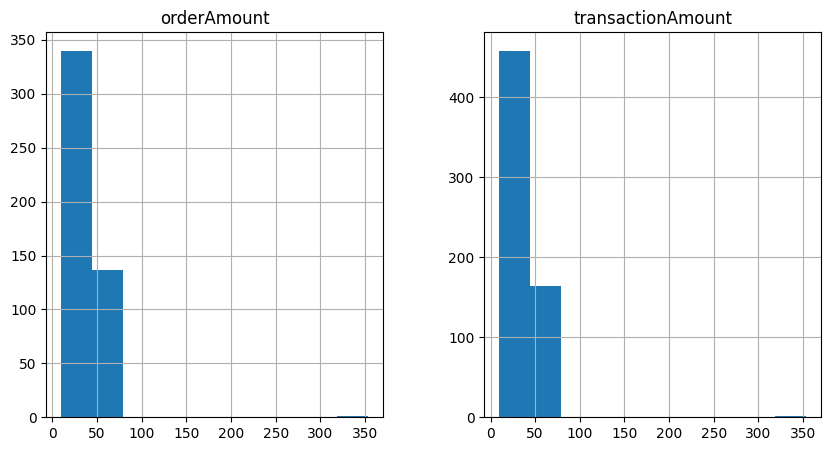

In [9]:
data.hist(figsize = (10,5))

Visualizamos 1 outlier a simple vista en cada conjunto de datos.  Hay que verificar.

In [10]:
profiling_num(data)

variable       mean    std_dev  variation_coef  p_0.01  p_0.05  \
0        orderAmount  35.606695  21.667298        0.608518    10.0    12.0   
1  transactionAmount  34.598716  20.360247        0.588468    10.0    12.0   

   p_0.25  p_0.5  p_0.75  p_0.95  p_0.99  
0    22.0   35.0    46.0    67.0   74.00  
1    21.0   34.0    45.0    65.0   73.78

## 3) Variables categóricas

<AxesSubplot:xlabel='count', ylabel='paymentMethodType'>

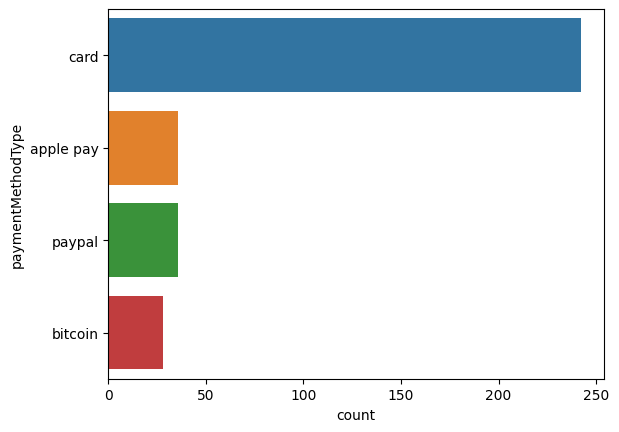

In [11]:
sns.countplot(y=data['paymentMethodType'], order = data['paymentMethodType'].value_counts().index)

In [12]:
freq_tbl(data['paymentMethodType'])

paymentMethodType  frequency  percentage  cumulative_perc
0              card        242    0.388443         0.707602
1         apple pay         36    0.057785         0.812865
2            paypal         36    0.057785         0.918129
3           bitcoin         28    0.044944         1.000000

In [13]:
payment_type=freq_tbl(data['paymentMethodType'])

payment_type.query("frequency<=30")['paymentMethodType']


3    bitcoin
Name: paymentMethodType, dtype: object

**El método de pago bitcoin es el unico con menos de 30 registros de pagos.**

# AED 2 😧

## 1) Análisis de variables categóricas

<AxesSubplot:xlabel='count', ylabel='fraudulent'>

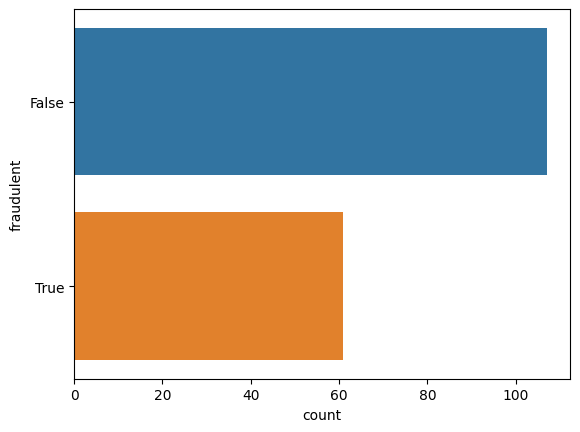

In [14]:
sns.countplot(y=data['fraudulent'], order = data['fraudulent'].value_counts().index)

In [15]:
freq_tbl(data['fraudulent'])

fraudulent  frequency  percentage  cumulative_perc
0      False        107    0.171750         0.636905
1       True         61    0.097913         1.000000

## 2) Análisis bivariado

### 2.A) Análisis de categórica vs. categórica

In [16]:
pd.crosstab(data.fraudulent, data.transactionFailed)

transactionFailed  False  True
fraudulent                    
False                 73    34
True                  44    17

In [17]:
pd.crosstab(data.fraudulent, data.transactionFailed, normalize=True)

transactionFailed     False      True
fraudulent                           
False              0.434524  0.202381
True               0.261905  0.101190

**Insights 💡**

La mayoría de las transacciones regulares se realizaron de forma exitosa (43.45%).

Aunque la mayoría de las transacciones regulares se completaron sin problemas, un número considerable tuvo fallas (20.24%).

Las transacciones fraudulentas tienen una tasa de falla menor respecto a las transacciones no fraudulentas que fallaron (10.12% vs 20.24%).

### 2.B) Análisis de numérica vs. categórica

In [18]:
data.groupby('fraudulent')['transactionAmount'].describe()

count       mean        std   min   25%   50%   75%   max
fraudulent                                                           
False       107.0  33.373832  16.519584  10.0  20.5  33.0  44.5  75.0
True         61.0  30.950820  14.548111  10.0  19.0  29.0  42.0  69.0

**Insights 💡**

Las transacciones fraudulentas tienen un monto promedio menor por transacción.

### 2.C) Análisis de numérica vs numérica

In [19]:
data.groupby('transactionAmount')['orderAmount'].describe()

count       mean         std   min    25%   50%    75%  \
transactionAmount                                                           
10                  10.0  67.300000  101.923773  15.0  19.00  40.0  55.00   
11                  18.0  36.500000   15.324912  11.0  27.50  38.0  45.00   
12                  14.0  33.071429   14.095631  11.0  25.25  30.5  44.75   
13                   3.0  44.000000   15.394804  27.0  37.50  48.0  52.50   
14                  20.0  35.000000   13.146943  11.0  29.00  36.5  43.50   
...                  ...        ...         ...   ...    ...   ...    ...   
72                   5.0  30.200000   21.924872  14.0  15.00  22.0  33.00   
73                   1.0  42.000000         NaN  42.0  42.00  42.0  42.00   
74                   4.0  29.250000   13.696107  10.0  24.25  33.5  38.50   
75                   2.0  38.500000   38.890873  11.0  24.75  38.5  52.25   
353                  1.0  25.000000         NaN  25.0  25.00  25.0  25.00   

                     max  
transactionAmount         
10                 353.0  
11                  74.0  
12                  61.0  
13                  57.0  
14                  64.0  
...                  ...  
72                  67.0  
73                  42.0  
74                  40.0  
75                  66.0  
353                 25.0  

[67 rows x 8 columns]

In [20]:
data.groupby('transactionAmount')['orderAmount'].mean().sort_values(ascending=False)

transactionAmount
69    68.000000
10    67.300000
26    52.666667
71    49.666667
53    49.000000
        ...    
52    21.000000
55    18.750000
64    14.000000
62          NaN
63          NaN
Name: orderAmount, Length: 67, dtype: float64

**Insights 💡**

No hay una correlación directa entre el monto gastado por orden y el monto gastado por transacción.

## 3) Gráficos en AED

### 3.A) Análisis de numérica vs. categórica

<AxesSubplot:xlabel='transactionFailed', ylabel='transactionAmount'>

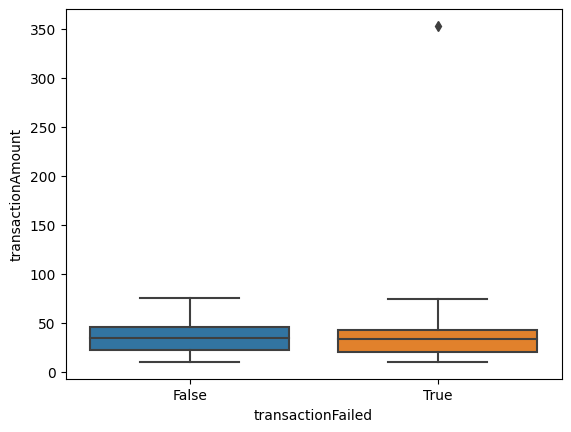

In [21]:
sns.boxplot(y = 'transactionAmount', x = 'transactionFailed', data = data)

In [22]:
data.query("transactionAmount>=100")['transactionFailed']

189    True
Name: transactionFailed, dtype: bool

In [50]:
#Eliminamos el outlier de transactionAmount porque no aporta valor

data = data.drop(data[data['transactionAmount'] > 100].index)

<AxesSubplot:xlabel='transactionFailed', ylabel='orderAmount'>

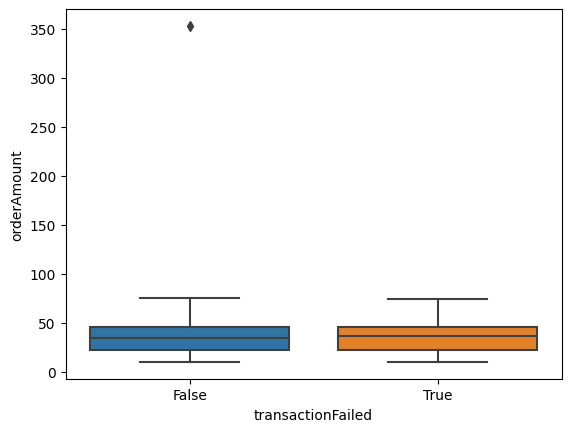

In [24]:
sns.boxplot(y = 'orderAmount', x = 'transactionFailed', data = data)

In [25]:
#Verificamos la cantidad de outliers

data.query("orderAmount>=100")['transactionFailed']

139    False
Name: transactionFailed, dtype: bool

In [51]:
#Eliminamos el outlier de orderAmount porque no aporta valor

data = data.drop(data[data['orderAmount'] > 100].index)

### 3.B) Análisis de categórica vs. categórica

c:\Users\karina\bcamp\lib\site-packages\seaborn\axisgrid.py:921: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(curr_labels, **kwargs)


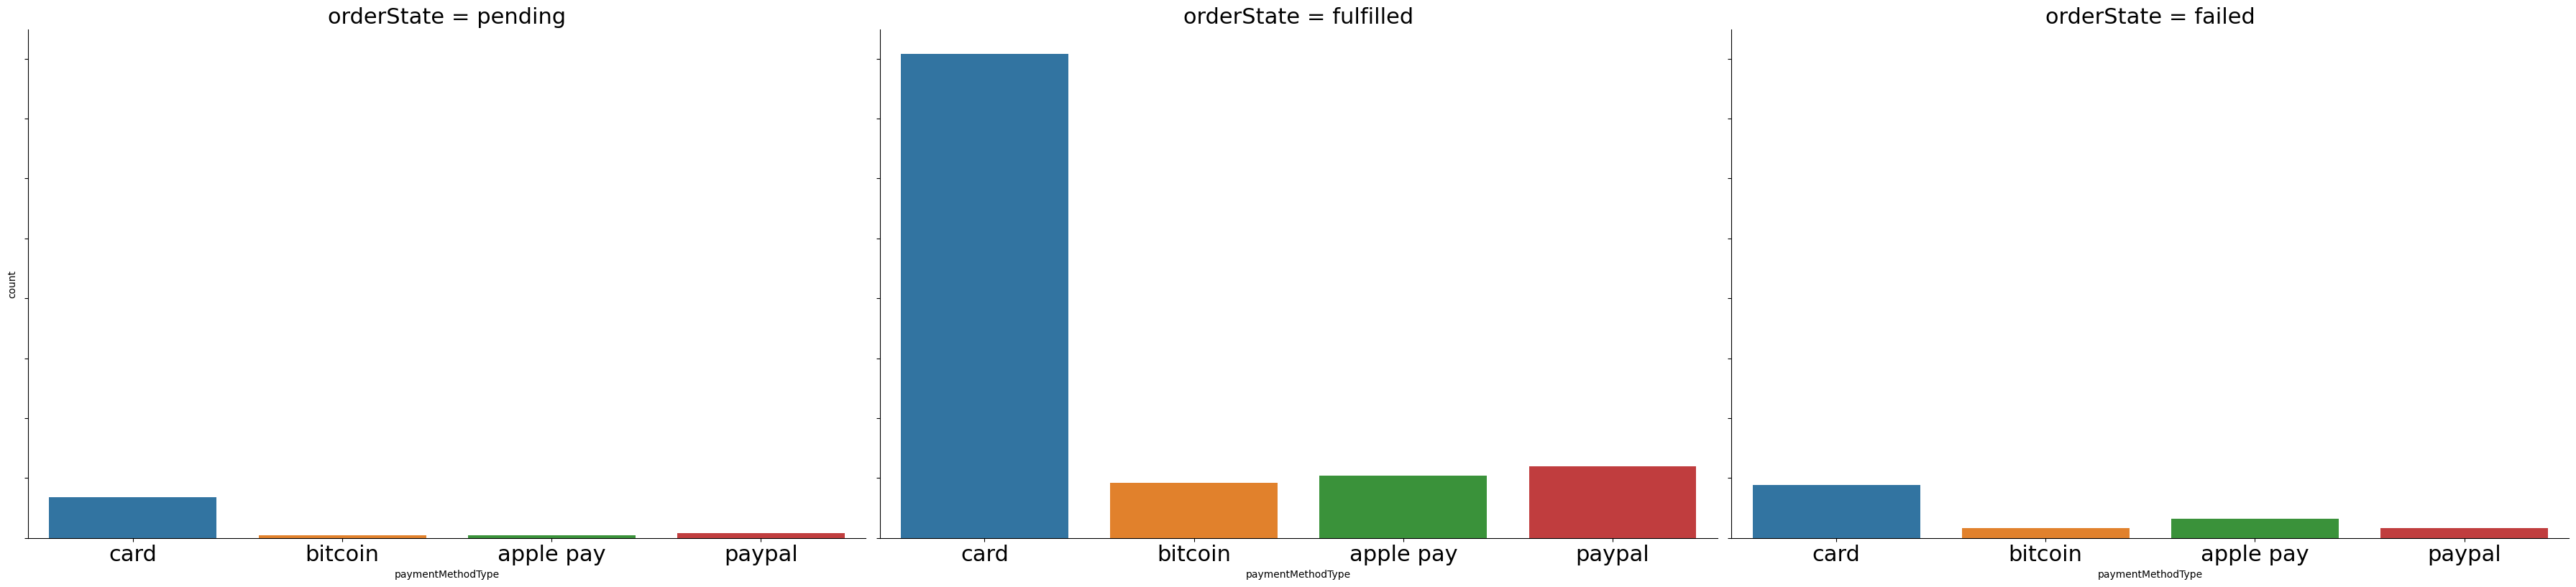

In [27]:
g = sns.catplot(x="paymentMethodType",
                col="orderState",
                data= data,
                kind="count",
                height=8,  
                aspect=1.5)

g.set_titles(size=22)  
g.set_xticklabels(size=22)
g.set_yticklabels(size=22)

### 3.C) Análisis de numérica vs. numérica

In [28]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

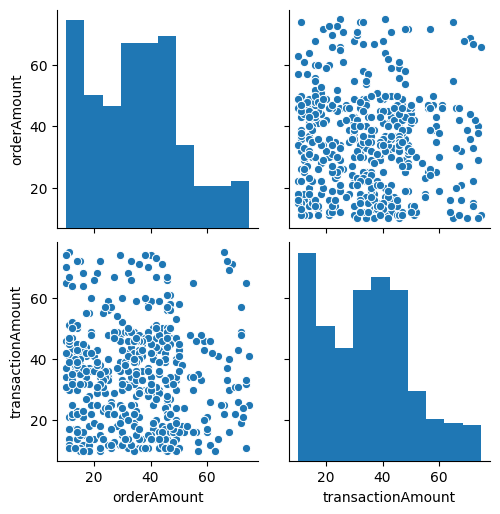

In [29]:
sns.pairplot(data_aux)

**Insights 💡**

Se verifica que no hay una relación lineal entre el monto gastado por orden y el monto gastado por transacción.

# CORRELACIÓN 🤯

## 1) Correlación: pairwaise correlation

In [30]:
from funpymodeling.exploratory import corr_pair

In [31]:
cor_d=corr_pair(data)
cor_d

v1                 v2         R        R2
1  transactionAmount        orderAmount -0.050352  0.002535
2  transactionFailed        orderAmount  0.005263  0.000028
3        orderAmount  transactionAmount -0.050352  0.002535
5  transactionFailed  transactionAmount -0.051826  0.002686
6        orderAmount  transactionFailed  0.005263  0.000028
7  transactionAmount  transactionFailed -0.051826  0.002686

**Se verifica que no hay correlación lineal entre el monto gastado por orden y el monto gastado por transacción.**

## 2.1) Transformación de variables (one hot encoding): cat -> num 

In [32]:
status(data)

variable  q_nan     p_nan  q_zeros   p_zeros  \
0                        orderAmount    145  0.233494        0  0.000000   
1                         orderState    145  0.233494        0  0.000000   
2   paymentMethodRegistrationFailure    281  0.452496      302  0.486312   
3                  paymentMethodType    281  0.452496        0  0.000000   
4              paymentMethodProvider    281  0.452496        0  0.000000   
5                paymentMethodIssuer    281  0.452496        0  0.000000   
6                  transactionAmount      0  0.000000        0  0.000000   
7                  transactionFailed      0  0.000000      454  0.731079   
8                         fraudulent    454  0.731079      106  0.170692   
9                        emailDomain      0  0.000000        0  0.000000   
10                     emailProvider      0  0.000000        0  0.000000   
11       customerIPAddressSimplified      0  0.000000        0  0.000000   
12                          sameCity      0  0.000000        0  0.000000   

    unique     type  
0       66  float64  
1        3   object  
2        2   object  
3        4   object  
4       10   object  
5       20   object  
6       66    int64  
7        2     bool  
8        2   object  
9        6   object  
10       5   object  
11       2   object  
12       3   object

In [33]:
data_test=pd.get_dummies(data)

In [34]:
status(data_test)

variable  q_nan     p_nan  \
0                                         orderAmount    145  0.233494   
1                                   transactionAmount      0  0.000000   
2                                   transactionFailed      0  0.000000   
3                                   orderState_failed      0  0.000000   
4                                orderState_fulfilled      0  0.000000   
5                                  orderState_pending      0  0.000000   
6              paymentMethodRegistrationFailure_False      0  0.000000   
7               paymentMethodRegistrationFailure_True      0  0.000000   
8                         paymentMethodType_apple pay      0  0.000000   
9                           paymentMethodType_bitcoin      0  0.000000   
10                             paymentMethodType_card      0  0.000000   
11                           paymentMethodType_paypal      0  0.000000   
12             paymentMethodProvider_American Express      0  0.000000   
13  paymentMethodProvider_Diners Club / Carte Blanche      0  0.000000   
14                     paymentMethodProvider_Discover      0  0.000000   
15                 paymentMethodProvider_JCB 15 digit      0  0.000000   
16                 paymentMethodProvider_JCB 16 digit      0  0.000000   
17                      paymentMethodProvider_Maestro      0  0.000000   
18                   paymentMethodProvider_Mastercard      0  0.000000   
19                paymentMethodProvider_VISA 13 digit      0  0.000000   
20                paymentMethodProvider_VISA 16 digit      0  0.000000   
21                      paymentMethodProvider_Voyager      0  0.000000   
22                              paymentMethodIssuer_       0  0.000000   
23                              paymentMethodIssuer_B      0  0.000000   
24                  paymentMethodIssuer_Bastion Banks      0  0.000000   
25            paymentMethodIssuer_Bulwark Trust Corp.      0  0.000000   
26           paymentMethodIssuer_Citizens First Banks      0  0.000000   
27        paymentMethodIssuer_Fountain Financial Inc.      0  0.000000   
28       paymentMethodIssuer_Grand Credit Corporation      0  0.000000   
29              paymentMethodIssuer_Her Majesty Trust      0  0.000000   
30         paymentMethodIssuer_His Majesty Bank Corp.      0  0.000000   
31                paymentMethodIssuer_Rose Bancshares      0  0.000000   
32                   paymentMethodIssuer_Solace Banks      0  0.000000   
33                 paymentMethodIssuer_Vertex Bancorp      0  0.000000   
34                              paymentMethodIssuer_a      0  0.000000   
35                              paymentMethodIssuer_c      0  0.000000   
36                              paymentMethodIssuer_e      0  0.000000   
37                              paymentMethodIssuer_n      0  0.000000   
38                              paymentMethodIssuer_o      0  0.000000   
39                              paymentMethodIssuer_p      0  0.000000   
40                              paymentMethodIssuer_r      0  0.000000   
41                              paymentMethodIssuer_x      0  0.000000   
42                                   fraudulent_False      0  0.000000   
43                                    fraudulent_True      0  0.000000   
44                                    emailDomain_biz      0  0.000000   
45                                    emailDomain_com      0  0.000000   
46                                   emailDomain_info      0  0.000000   
47                                    emailDomain_net      0  0.000000   
48                                    emailDomain_org      0  0.000000   
49                                  emailDomain_weird      0  0.000000   
50                                emailProvider_gmail      0  0.000000   
51                              emailProvider_hotmail      0  0.000000   
52                                emailProvider_other      0  0.000000   
53                                emailProvider_w

In [35]:
#Creamos la variable nulos para todas las variables categóricas
data2=pd.get_dummies(data, dummy_na=True)

In [36]:
status(data2)

variable  q_nan     p_nan  q_zeros   p_zeros  \
0                       orderAmount    145  0.233494        0  0.000000   
1                 transactionAmount      0  0.000000        0  0.000000   
2                 transactionFailed      0  0.000000      454  0.731079   
3                 orderState_failed      0  0.000000      571  0.919485   
4              orderState_fulfilled      0  0.000000      223  0.359098   
..                              ...    ...       ...      ...       ...   
65  customerIPAddressSimplified_nan      0  0.000000      621  1.000000   
66                      sameCity_no      0  0.000000      485  0.780998   
67                 sameCity_unknown      0  0.000000      138  0.222222   
68                     sameCity_yes      0  0.000000      619  0.996779   
69                     sameCity_nan      0  0.000000      621  1.000000   

    unique     type  
0       66  float64  
1       66    int64  
2        2     bool  
3        2    uint8  
4        2    uint8  
..     ...      ...  
65       1    uint8  
66       2    uint8  
67       2    uint8  
68       2    uint8  
69       1    uint8  

[70 rows x 7 columns]

In [37]:
#Eliminamos las categorías con valores unicos
vars_to_drop=status(data2).query("unique<=1")['variable']

data3=data2.drop(vars_to_drop, axis=1)

In [38]:
status(data3)

variable  q_nan     p_nan  q_zeros  \
0                                      orderAmount    145  0.233494        0   
1                                transactionAmount      0  0.000000        0   
2                                transactionFailed      0  0.000000      454   
3                                orderState_failed      0  0.000000      571   
4                             orderState_fulfilled      0  0.000000      223   
..                                             ...    ...       ...      ...   
61  customerIPAddressSimplified_digits_and_letters      0  0.000000      545   
62        customerIPAddressSimplified_only_letters      0  0.000000       76   
63                                     sameCity_no      0  0.000000      485   
64                                sameCity_unknown      0  0.000000      138   
65                                    sameCity_yes      0  0.000000      619   

     p_zeros  unique     type  
0   0.000000      66  float64  
1   0.000000      66    int64  
2   0.731079       2     bool  
3   0.919485       2    uint8  
4   0.359098       2    uint8  
..       ...     ...      ...  
61  0.877617       2    uint8  
62  0.122383       2    uint8  
63  0.780998       2    uint8  
64  0.222222       2    uint8  
65  0.996779       2    uint8  

[66 rows x 7 columns]

## 2.2) Gráficos Correlación 📊 entre todas las variables

In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:>

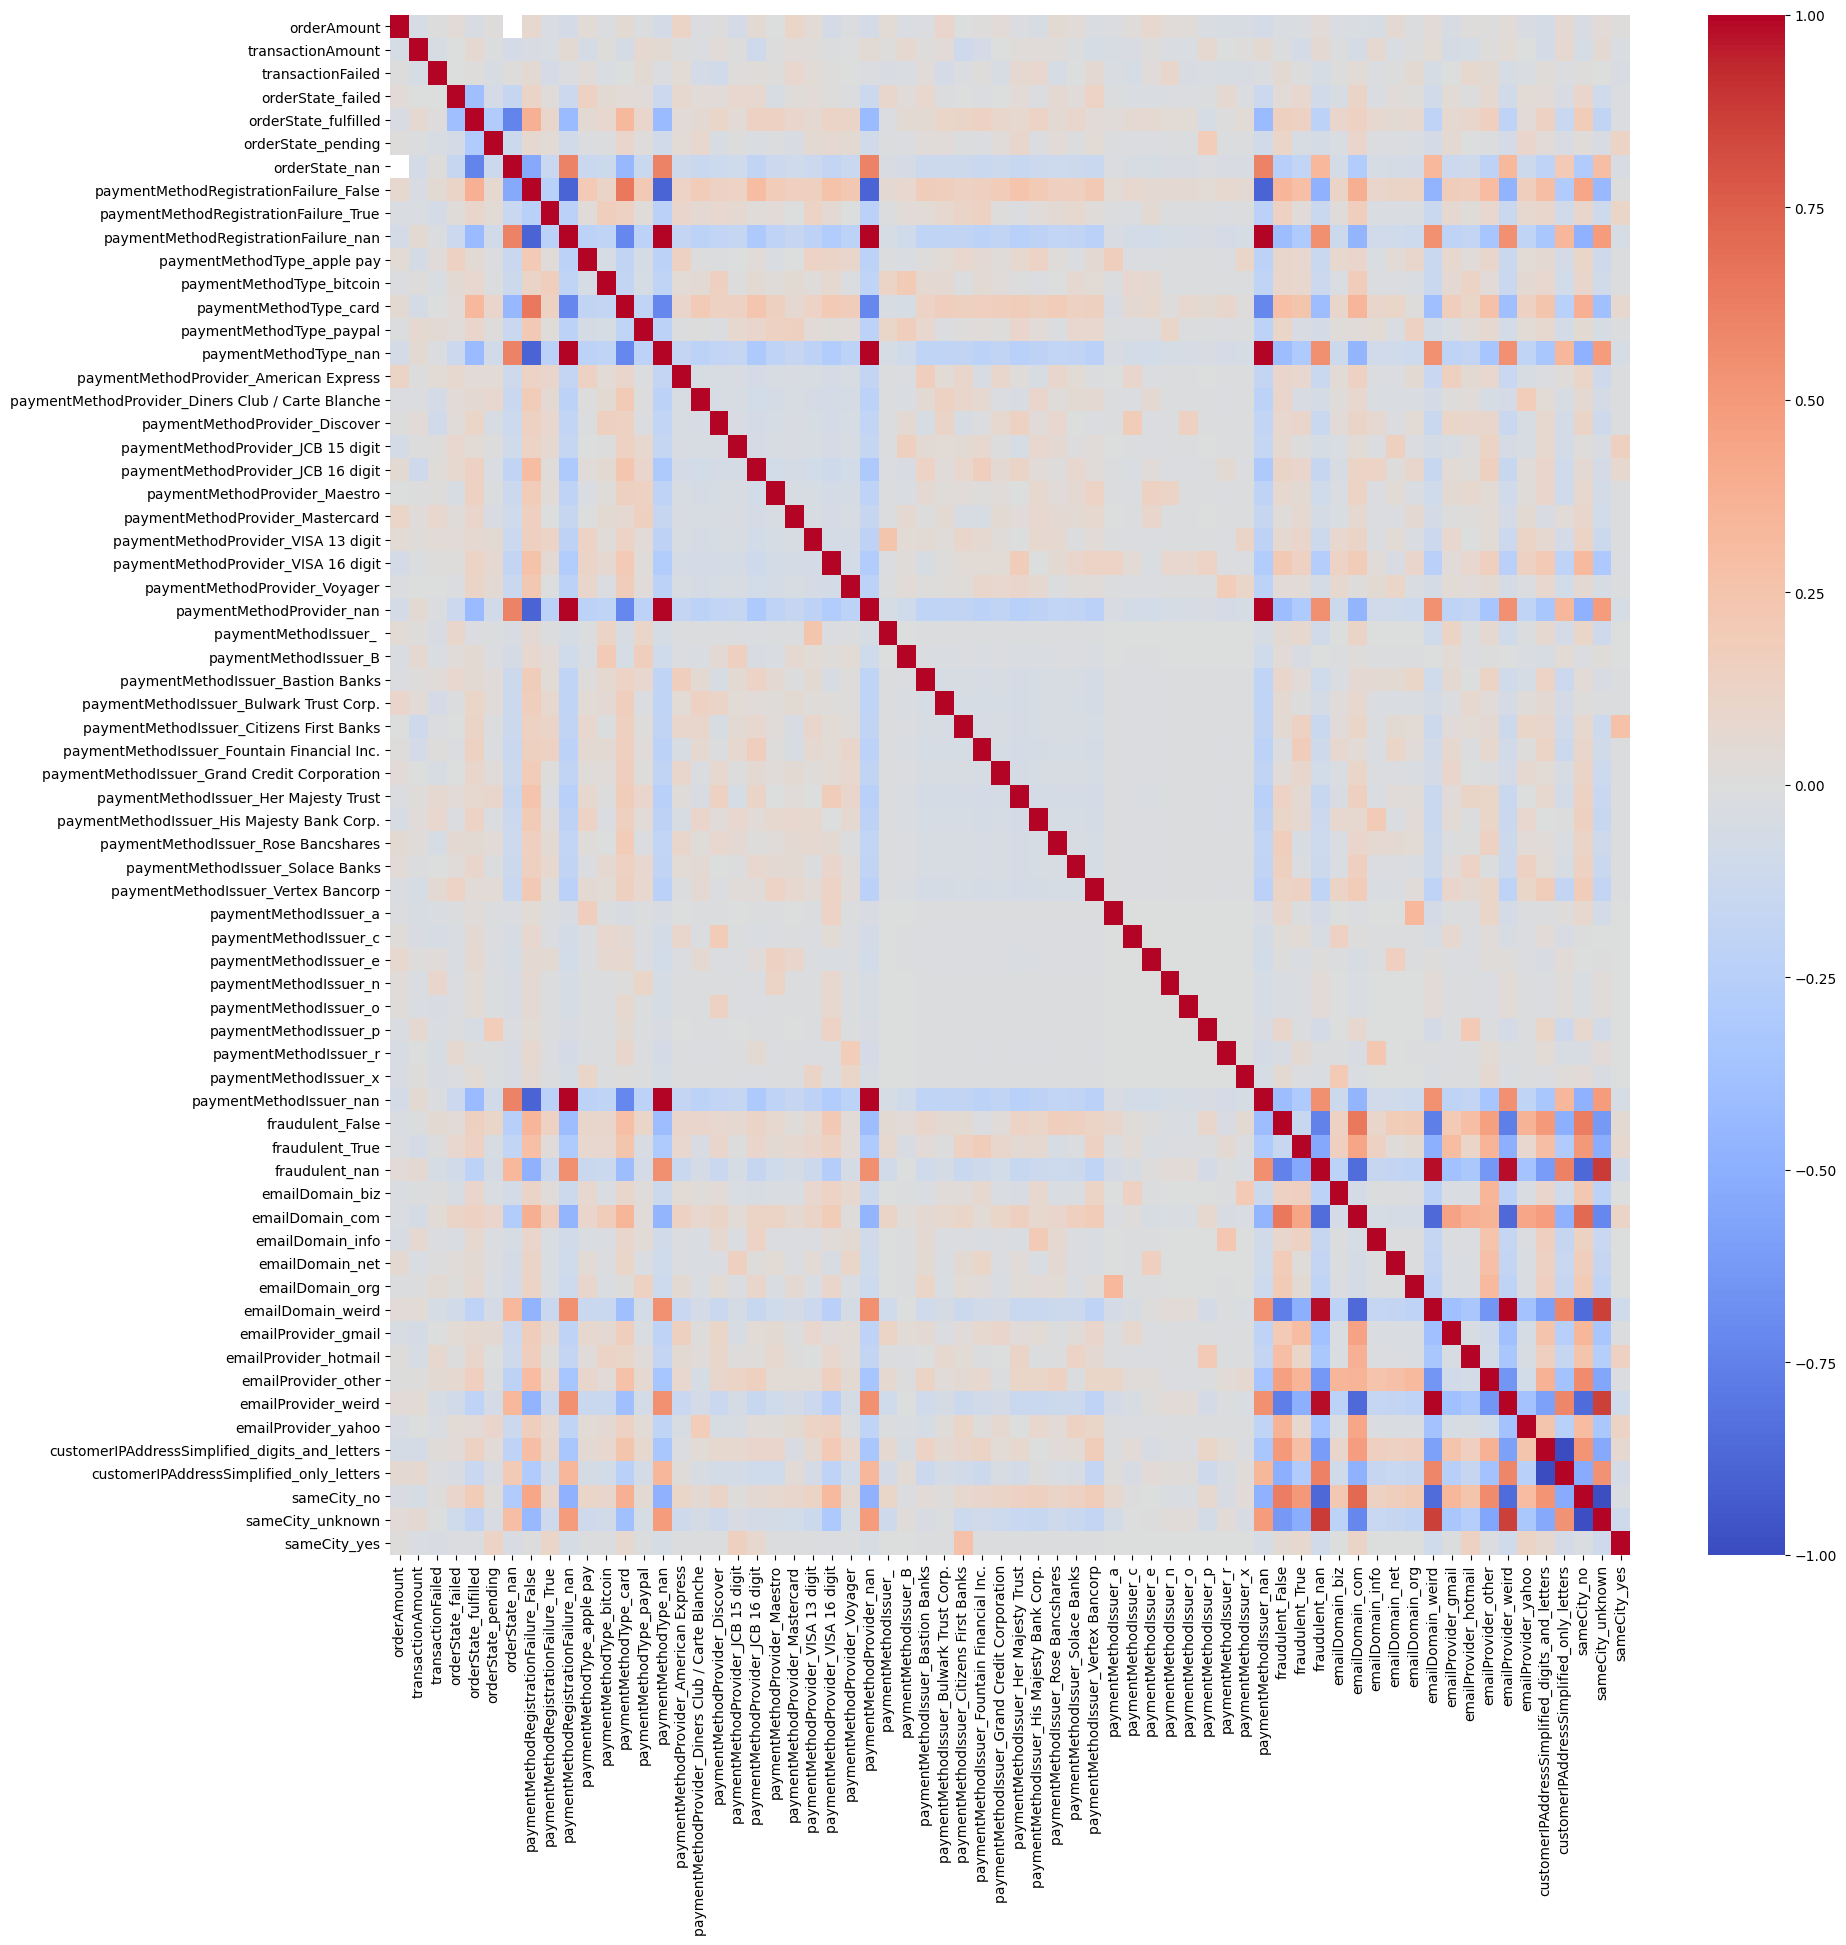

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(data3.corr(), cmap='coolwarm')

In [41]:
#Para visualizar el valor absoluto de R para todas las variables y detectar las colinealidades.

cor_d=corr_pair(data3)
cor_d['absR'] = abs(cor_d['R'])
cor_d.sort_values(by=['absR'], ascending=False)

v1  \
970                        paymentMethodIssuer_nan   
1696                       paymentMethodIssuer_nan   
3061                     paymentMethodProvider_nan   
3949                             emailDomain_weird   
608                          paymentMethodType_nan   
...                                            ...   
2238                           emailProvider_yahoo   
2169                         emailProvider_hotmail   
3794  paymentMethodIssuer_Grand Credit Corporation   
6                                   orderState_nan   
396                                    orderAmount   

                                                v2             R  \
970                          paymentMethodType_nan  1.000000e+00   
1696                     paymentMethodProvider_nan  1.000000e+00   
3061                       paymentMethodIssuer_nan  1.000000e+00   
3949                           emailProvider_weird  1.000000e+00   
608           paymentMethodRegistrationFailure_nan  1.000000e+00   
...                                            ...           ...   
2238         paymentMethodIssuer_Her Majesty Trust -2.420539e-04   
2169  paymentMethodIssuer_Grand Credit Corporation -4.591303e-17   
3794                         emailProvider_hotmail -4.591303e-17   
6                                      orderAmount           NaN   
396                                 orderState_nan           NaN   

                R2          absR  
970   1.000000e+00  1.000000e+00  
1696  1.000000e+00  1.000000e+00  
3061  1.000000e+00  1.000000e+00  
3949  1.000000e+00  1.000000e+00  
608   1.000000e+00  1.000000e+00  
...            ...           ...  
2238  5.859007e-08  2.420539e-04  
2169  2.108006e-33  4.591303e-17  
3794  2.108006e-33  4.591303e-17  
6              NaN           NaN  
396            NaN           NaN  

[4290 rows x 5 columns]

## **Insights Gráfico de Correlación💡**

**1)** Cuando el valor de la comparación entre ciudades da desconocido (sameCity_unknown), es muy probable encontrar valores extraños en el dominio del mail (emailDomain_weird). Presentan correlación fuerte.

**2)** Cuando el valor de la comparación entre ciudades da negativo (sameCity_no), es muy probable encontrar clientes fraudulentos (fraudulent_True).  Presentan correlación moderada.

**3)** Cuando el dominio del mail es extraño (emailDomain_weird), es muy probable encontrar clientes fraudulentos (fraudulent_True). Presentan correlación moderada.


**4)** Cuando el valor de la comparación entre ciudades es desconocido (sameCity_unknown), es muy probable encontrar clientes fraudulentos (fraudulent_True). Presentan correlación moderada.

**5)** Cuando el dominio del mail es extraño (emailDomain_weird), es muy probable que no se registre la clasificación de si el cliente fue fraudulento (fraudulent_nan).  Presentan correlación fuerte.

...Solo porque me interesó...

**6)**  Cuando el valor de la comparación entre ciudades da desconocido (sameCity_unknown), es más probable que no se registre la clasificación de si el cliente fue fraudulento (fraudulent_nan).  Presentan correlación fuerte.


**7)** Cuando los registros  de método de pago se dan sin fallas (paymentMethodRegistrationFailure_False), es muy probable que no se registre el método de pago (paymentMethodType_nan).  Presentan correlación fuerte.


**8)** Cuando los registros  de método de pago se dan sin fallas (paymentMethodRegistrationFailure_False), es muy probable que no se registre el proveedor de método de pago (paymentMethodProvider_nan).  Presentan correlación fuerte.


**9)** Cuando los registros  de método de pago se dan sin fallas (paymentMethodRegistrationFailure_False), es muy probable que no se registre el emisor de método de pago (paymentMethodIssuer_nan).  Presentan correlación fuerte.

## 4) Análisis de correlaciones no lineales basadas en teoría de la información

In [42]:
from minepy import MINE

In [43]:
# 1ro hago la especificación
mine = MINE(alpha=0.6, c=15, est="mic_approx")
# mine = MINE()

# 2do calculo de los estadísticos
mine.compute_score(data3['transactionAmount'], data3['transactionFailed'])

# 3ro acceso a los resultados (estadísticos)
mine.mic()


0.060113011266537474

No hay dependencia entre transactionAmount y transactionFailed

In [44]:
import itertools
col_pairs=list(itertools.combinations(data3.columns, 2))

In [45]:
df_res = pd.DataFrame()

In [ ]:
for a,b in col_pairs:
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(data3[a], data3[b])
    df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)

In [47]:
df_res.head(10)

v1                                      v2       mic
0  orderAmount                       transactionAmount  0.157087
1  orderAmount                       transactionFailed  0.124262
2  orderAmount                       orderState_failed  0.121036
3  orderAmount                    orderState_fulfilled  0.528712
4  orderAmount                      orderState_pending  0.071462
5  orderAmount                          orderState_nan  0.784053
6  orderAmount  paymentMethodRegistrationFailure_False  0.338711
7  orderAmount   paymentMethodRegistrationFailure_True  0.087525
8  orderAmount    paymentMethodRegistrationFailure_nan  0.397727
9  orderAmount             paymentMethodType_apple pay  0.079925

In [48]:
sorted_df = df_res.sort_values(by=['mic'], ascending=False)

In [52]:
sorted_df

v1  \
564           paymentMethodRegistrationFailure_nan   
553           paymentMethodRegistrationFailure_nan   
585           paymentMethodRegistrationFailure_nan   
829                          paymentMethodType_nan   
1345                     paymentMethodProvider_nan   
...                                            ...   
1675    paymentMethodIssuer_His Majesty Bank Corp.   
1676    paymentMethodIssuer_His Majesty Bank Corp.   
1252           paymentMethodProvider_VISA 16 digit   
1643         paymentMethodIssuer_Her Majesty Trust   
1608  paymentMethodIssuer_Grand Credit Corporation   

                                                  v2           mic  
564                        paymentMethodProvider_nan  9.934789e-01  
553                            paymentMethodType_nan  9.934789e-01  
585                          paymentMethodIssuer_nan  9.934789e-01  
829                        paymentMethodProvider_nan  9.934789e-01  
1345                         paymentMethodIssuer_nan  9.934789e-01  
...                                              ...           ...  
1675  customerIPAddressSimplified_digits_and_letters  5.183164e-07  
1676        customerIPAddressSimplified_only_letters  5.183164e-07  
1252      paymentMethodIssuer_His Majesty Bank Corp.  3.756850e-07  
1643                             emailProvider_yahoo  4.231363e-08  
1608                           emailProvider_hotmail  8.008566e-17  

[2145 rows x 3 columns]